# Quickly viz ROI data

WARNING: if no trials for a subject for a condition, average might be near zero! For quick viz only

In [2]:
import os.path as op

import pandas as pd
import numpy as np
# for plotting
import seaborn as sns
import statsmodels as sm
import scipy as sp
import matplotlib.pyplot as plt
sns.set(style='ticks', context='poster')
%matplotlib inline

/Users/steph-backup/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
import nibabel as nib

### PPA mask using sample -white (original)

count     44.000000
mean      80.227273
std       28.857197
min       33.000000
25%       57.750000
50%       78.500000
75%       92.000000
max      176.000000
dtype: float64
Subj w/the biggest mask: ap102, 176.0 voxels
Subj w/the smallest mask: ap168, 33.0 voxels


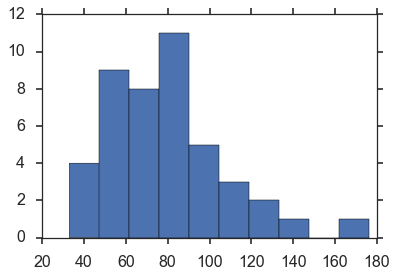

In [6]:
# Assess if mask is similar sizes across subjects 
mask_name = 'bilat-ppa_scene.nii.gz'
mask_dir = '/Volumes/group/awagner/sgagnon/AP/data/{subid}/masks/' + mask_name
subjects = np.loadtxt('/Volumes/group/awagner/sgagnon/AP/scripts/subjects.txt', str)

size = {}
for subid in subjects:
    mask_path = mask_dir.format(subid=subid)
    mask = nib.load(mask_path).get_data()
    size.update({subid:np.sum(mask)})
    
plt.hist(size.values())

print pd.Series(size.values()).describe()

print 'Subj w/the biggest mask: ' + max(size, key=size.get) + ', ' + str(size[max(size, key=size.get)]) + ' voxels'
print 'Subj w/the smallest mask: ' + min(size, key=size.get) + ', ' + str(size[min(size, key=size.get)]) + ' voxels'

### PPA mask using sample -graymid (updated)

count     44.000000
mean      95.931818
std       28.924439
min       39.000000
25%       74.500000
50%       95.000000
75%      110.000000
max      181.000000
dtype: float64
Subj w/the biggest mask: ap102, 181.0 voxels
Subj w/the smallest mask: ap168, 39.0 voxels


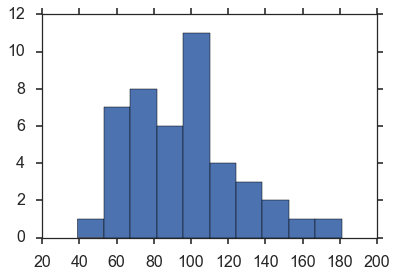

In [7]:
# Assess if mask is similar sizes across subjects 
mask_name = 'bilat-ppa_scene_graymid.nii.gz'
mask_dir = '/Volumes/group/awagner/sgagnon/AP/data/{subid}/masks/' + mask_name
subjects = np.loadtxt('/Volumes/group/awagner/sgagnon/AP/scripts/subjects.txt', str)

size = {}
for subid in subjects:
    mask_path = mask_dir.format(subid=subid)
    mask = nib.load(mask_path).get_data()
    size.update({subid:np.sum(mask)})
    
plt.hist(size.values())

print pd.Series(size.values()).describe()

print 'Subj w/the biggest mask: ' + max(size, key=size.get) + ', ' + str(size[max(size, key=size.get)]) + ' voxels'
print 'Subj w/the smallest mask: ' + min(size, key=size.get) + ', ' + str(size[min(size, key=size.get)]) + ' voxels'

## Associative memory

In [101]:
fileroot = '/Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group'
masks = pd.read_csv(op.join(fileroot, 'func_masks.csv'))

df = pd.DataFrame()
for mask in masks.roi:
    df_mask = pd.read_csv(op.join(fileroot, 'roi', 'pe_' + mask + '.csv'), index_col=0)
    df = df.append(df_mask, ignore_index=True)

df.head()

,cond,hemi,mask_vox,regspace,roi,smoothing,subid,value,group
0,CR,bilat,33,epi,ppa_scene_limitvox,unsmoothed,ap100,196.657913,control
1,FA,bilat,33,epi,ppa_scene_limitvox,unsmoothed,ap100,944.895508,control
2,sourcehit,bilat,33,epi,ppa_scene_limitvox,unsmoothed,ap100,2288.723633,control
3,itemhit_lo,bilat,33,epi,ppa_scene_limitvox,unsmoothed,ap100,1207.521973,control
4,sourcemiss_hi,bilat,33,epi,ppa_scene_limitvox,unsmoothed,ap100,1676.561401,control


ppa_scene_limitvox
ppa_scene


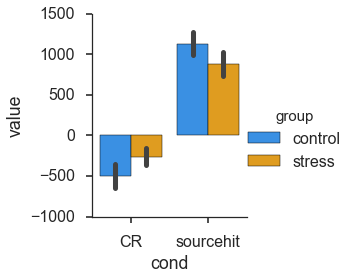

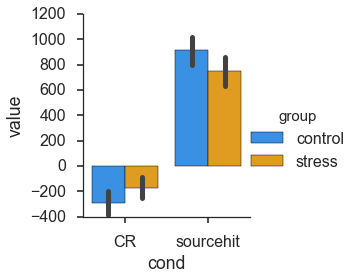

In [102]:
output = op.join(fileroot, 'roi', 'pe_{roi}_SHvCR.png')

for roi in set(df.roi):

    print roi
    sns.factorplot(x='cond', y='value', hue='group', ci=68, 
                   palette=['dodgerblue', 'orange'], 
                   kind='bar',
                   data=df.loc[(df.cond.isin(['sourcehit', 'CR'])) &
                               (df.roi == roi)])
    
    plt.savefig(output.format(roi=roi))

In [103]:
for cond in ['sourcehit', 'CR']:
    print cond
    for roi in set(df.roi):
        print roi
        print sp.stats.ttest_ind(df.loc[(df.roi == roi) & 
                              (df.cond.isin([cond])) & 
                              (df.group == 'control'), 'value'], 
                       df.loc[(df.roi == roi) & 
                              (df.cond.isin([cond])) & 
                              (df.group == 'stress'), 'value'])

sourcehit
ppa_scene_limitvox
Ttest_indResult(statistic=1.1887249236349426, pvalue=0.24122584988857473)
ppa_scene
Ttest_indResult(statistic=0.99247873900491812, pvalue=0.32664776108461335)
CR
ppa_scene_limitvox
Ttest_indResult(statistic=-1.2853340720090471, pvalue=0.20571819764215749)
ppa_scene
Ttest_indResult(statistic=-0.90256661844838248, pvalue=0.37190331398705034)


#### Anatomical masks:

In [12]:
fileroot = '/Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group'
masks = pd.read_csv(op.join(fileroot, 'anat_masks.csv'))

df = pd.DataFrame()
for mask in masks.roi:
    df_mask = pd.read_csv(op.join(fileroot, 'roi', 'pe_' + mask + '.csv'), index_col=0)
    df = df.append(df_mask, ignore_index=True)

df.head()

,cond,hemi,mask_vox,regspace,roi,smoothing,subid,value,group
0,CR,lh,19,epi,hippocampus-tail,unsmoothed,ap100,-61.496696,control
1,CR,rh,38,epi,hippocampus-tail,unsmoothed,ap100,-616.685364,control
2,FA,lh,19,epi,hippocampus-tail,unsmoothed,ap100,326.804413,control
3,FA,rh,38,epi,hippocampus-tail,unsmoothed,ap100,-34.641930,control
4,sourcehit,lh,19,epi,hippocampus-tail,unsmoothed,ap100,548.308289,control


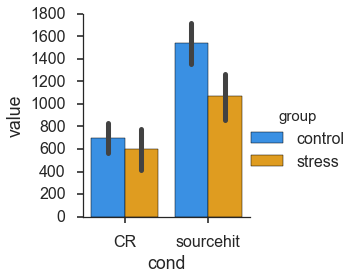

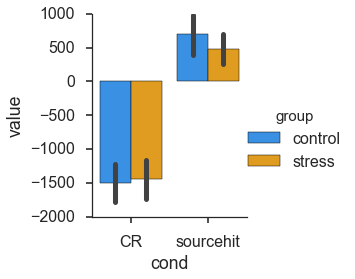

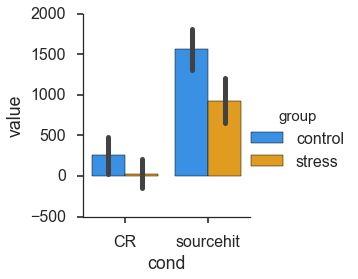

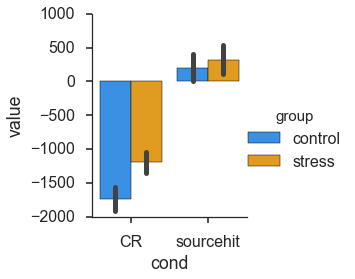

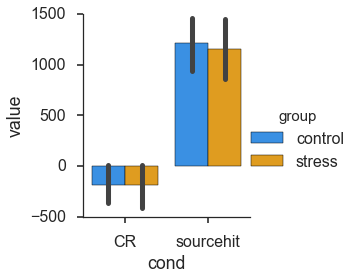

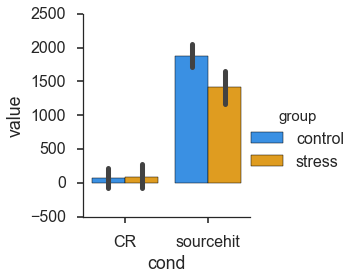

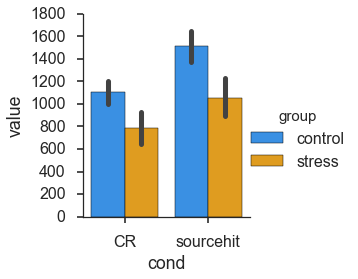

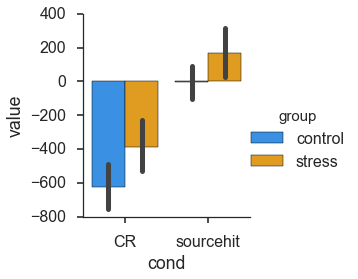

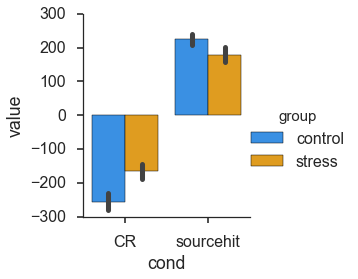

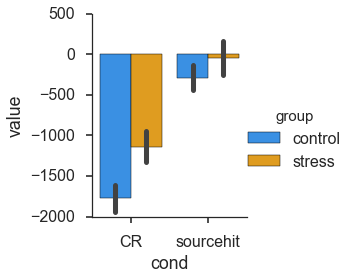

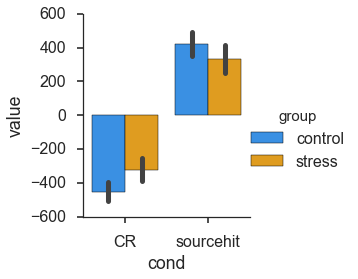

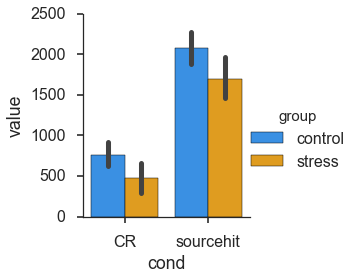

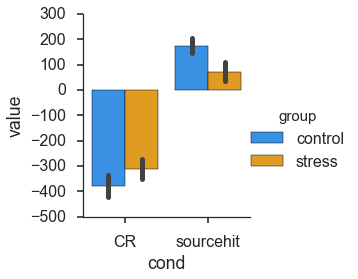

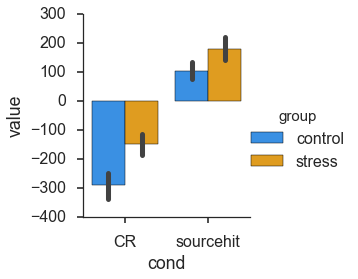

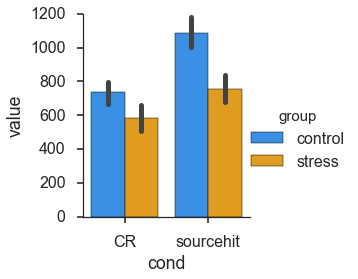

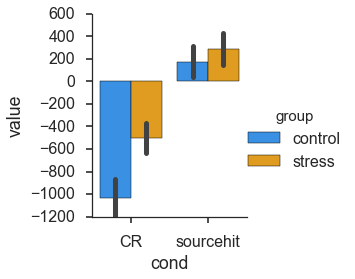

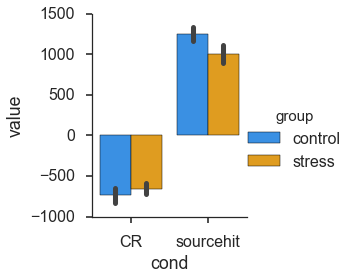

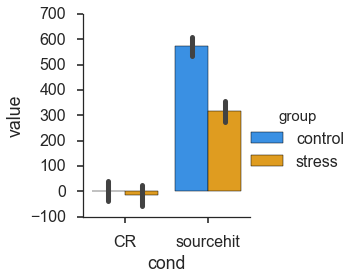

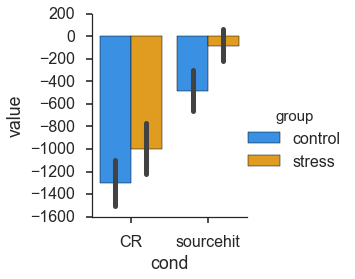

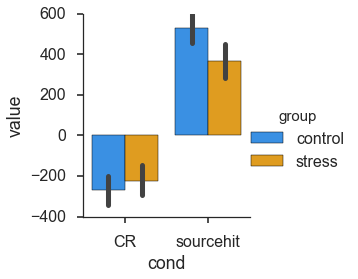

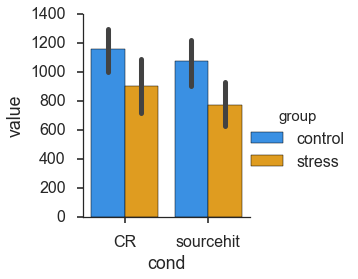

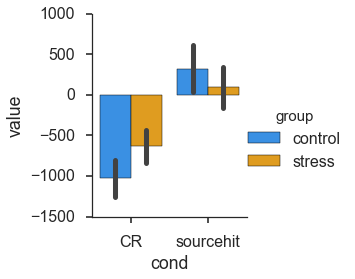

In [13]:
output = op.join(fileroot, 'roi', 'pe_{roi}_SHvCR.png')

for roi in set(df.roi):

    sns.factorplot(x='cond', y='value', hue='group', ci=68, 
                   palette=['dodgerblue', 'orange'], 
                   kind='bar',
                   data=df.loc[(df.cond.isin(['sourcehit', 'CR'])) &
                               (df.roi == roi)])
    
    plt.savefig(output.format(roi=roi))

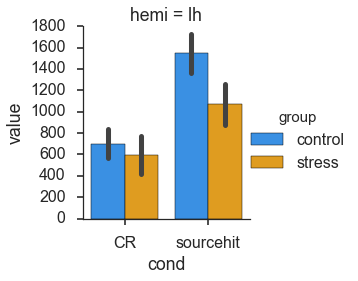

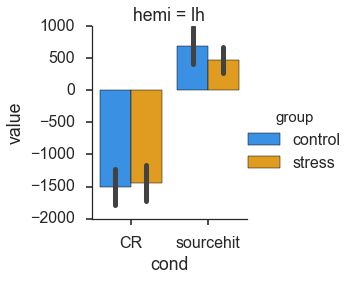

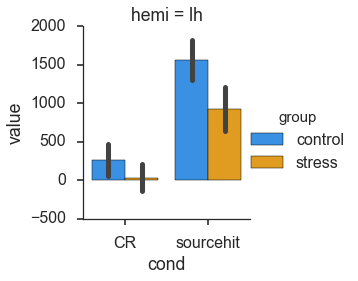

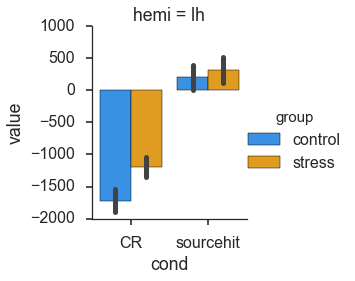

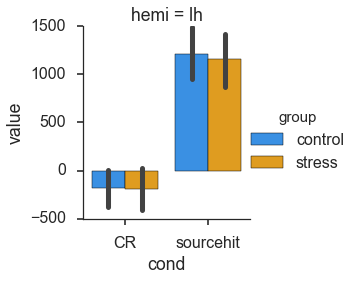

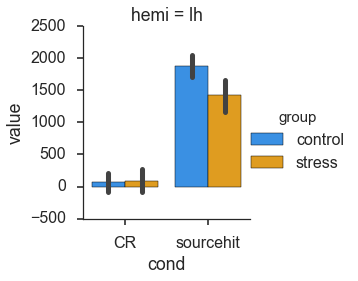

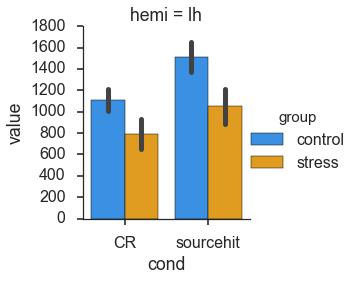

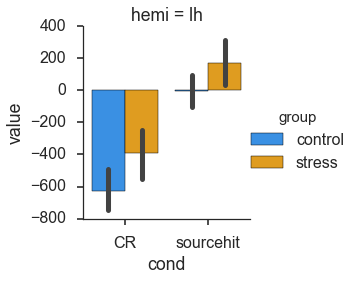

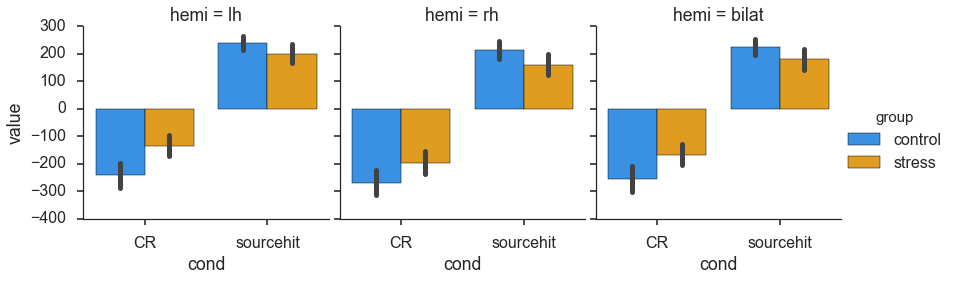

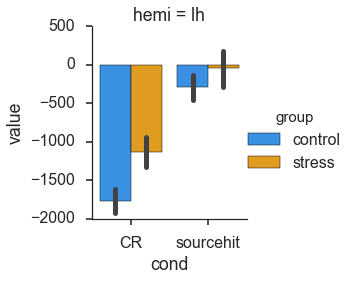

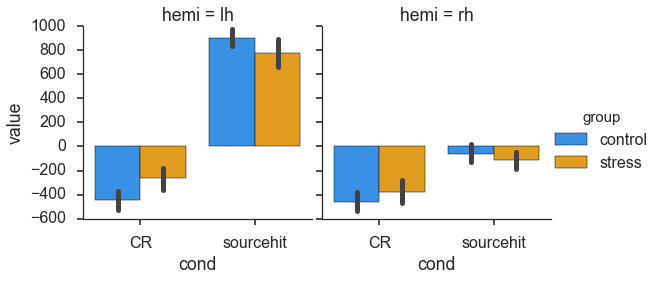

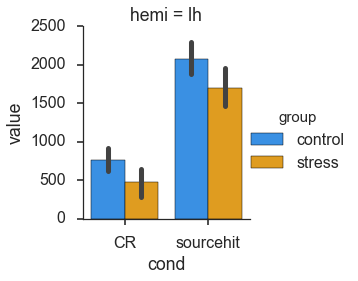

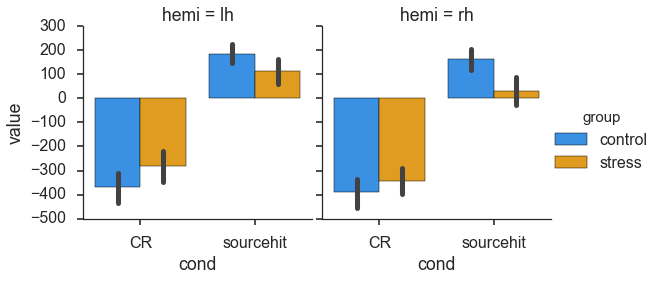

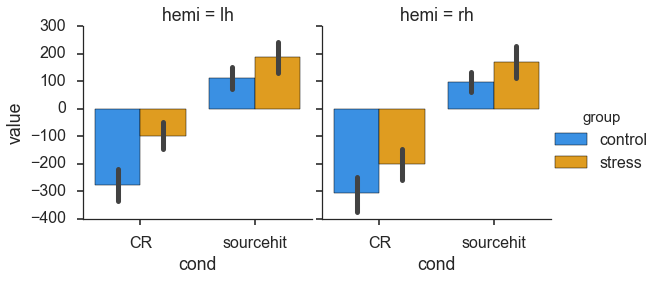

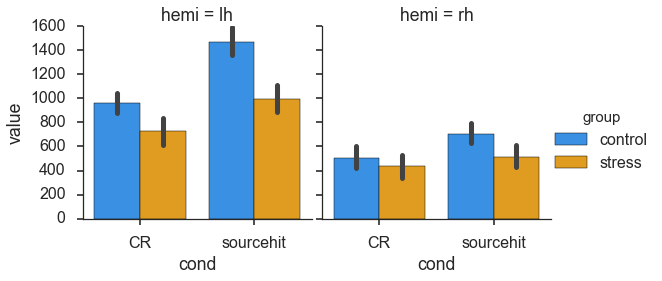

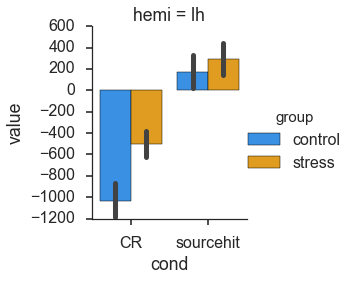

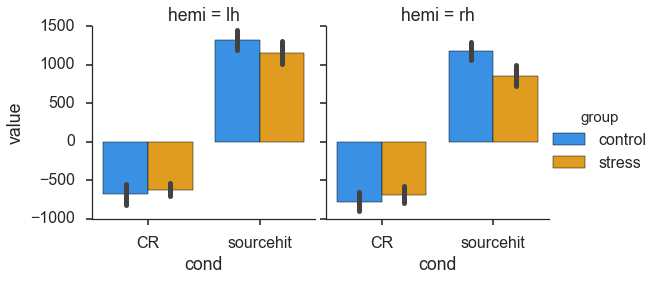

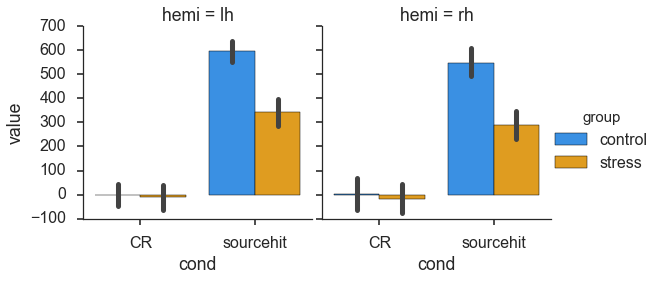

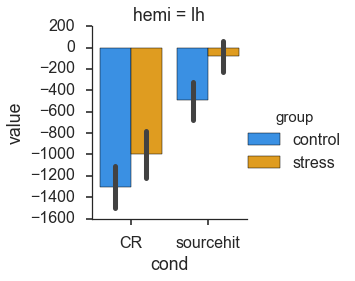

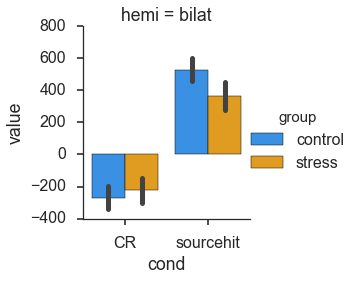

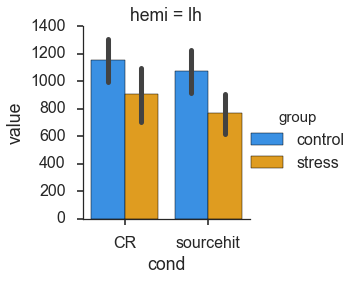

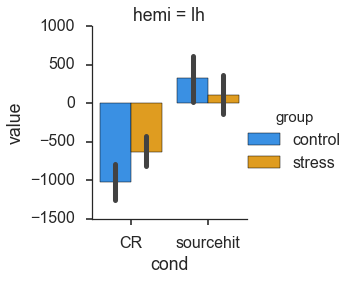

In [14]:
output = op.join(fileroot, 'roi', 'pe_{roi}_SHvCR_byhemi.png')

for roi in set(df.roi):

    sns.factorplot(x='cond', y='value', hue='group', ci=68, 
                   palette=['dodgerblue', 'orange'], 
                   kind='bar', col='hemi',
                   data=df.loc[(df.cond.isin(['sourcehit', 'CR'])) &
                               (df.roi == roi)])
    
    plt.savefig(output.format(roi=roi))

## Parametric modulation by reinstatement strength (confirm activation in ppa/rsp/opa)

%%bash
python extract_copes.py -exp ap_memory_raw -alt scene_logit_nohipp -masks anat_masks.csv -group_info subjects_groups.csv

In [ ]:
fileroot = '/Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw-scene_logit_nohipp/group'
masks = pd.read_csv(op.join(fileroot, 'anat_masks.csv'))

df = pd.DataFrame()
for mask in masks.roi:
    df_mask = pd.read_csv(op.join(fileroot, 'roi', 'pe_' + mask + '.csv'), index_col=0)
    df = df.append(df_mask, ignore_index=True)

df.head()

In [ ]:
# plot main effects and param logits separately
df[['trial_type', 'reg_type']] = pd.DataFrame(df.cond.str.split('_').tolist(), columns=['trial_type', 'reg_type'])
df.fillna(value='main', inplace=True)
df.replace(to_replace = 'scene', value='logit', inplace=True)
df.head()

In [ ]:
output = op.join(fileroot, 'roi', 'pe_{roi}_logit.png')

for roi in set(df.roi):
    print roi
    sns.factorplot(x='trial_type', y='value', hue='group', ci=68, 
                   col='reg_type',
                   palette=['dodgerblue', 'orange'], 
                   kind='bar',
                   data=df.loc[(df.cond.isin(['old_scene', 'new_scene', 'old', 'new'])) &
                               (df.roi == roi)])
    
    plt.savefig(output.format(roi=roi))

## Associative memory broken down by block type

In [16]:
fileroot = '/Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw-byshockCond/group'
masks = pd.read_csv(op.join(fileroot, 'anat_masks.csv'))

df = pd.DataFrame()
for mask in masks.roi:
    df_mask = pd.read_csv(op.join(fileroot, 'roi', 'pe_' + mask + '.csv'), index_col=0)
    df = df.append(df_mask, ignore_index=True)
    
df[['cond', 'block']] = df.cond.str.rsplit('_', 1, expand=True)

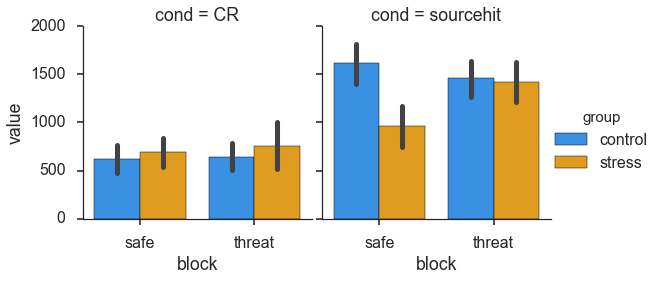

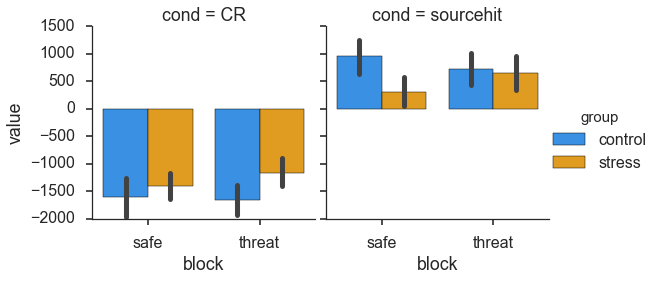

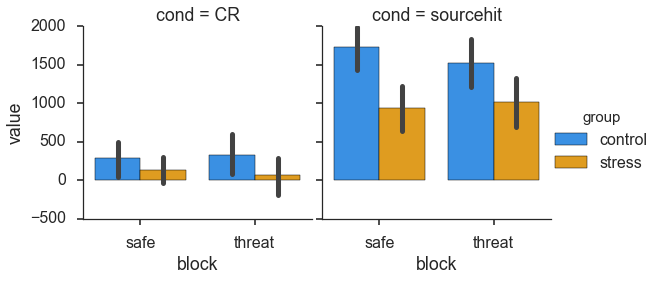

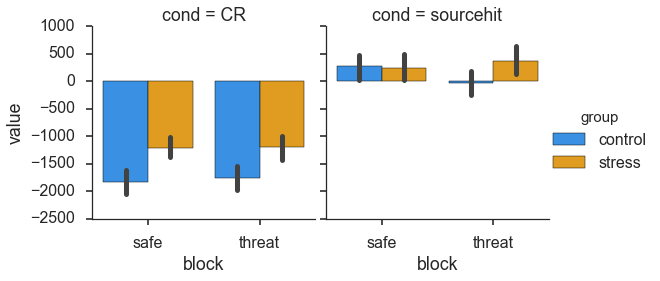

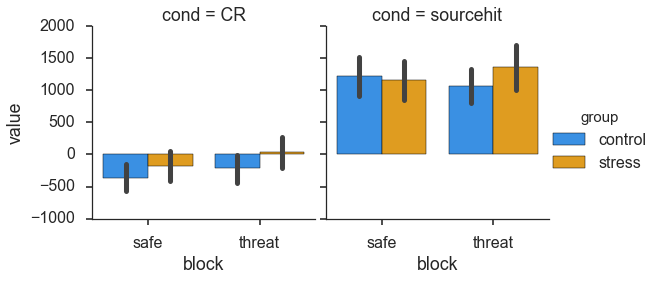

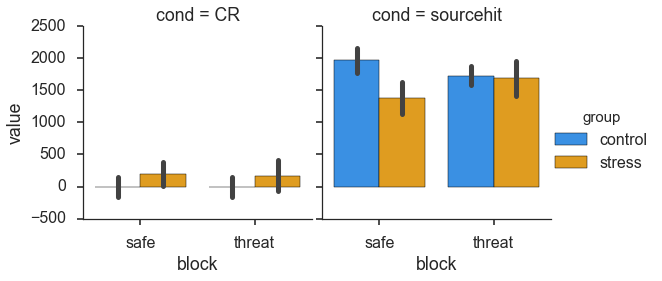

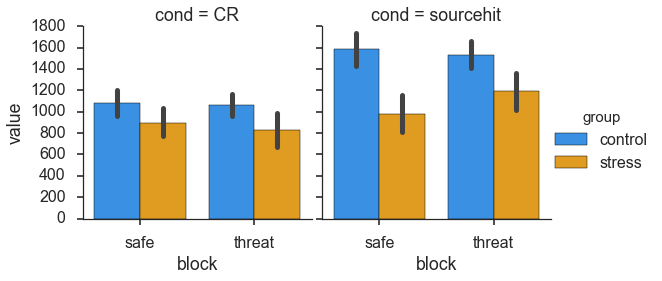

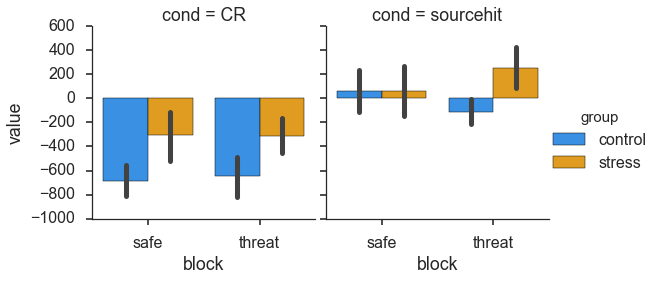

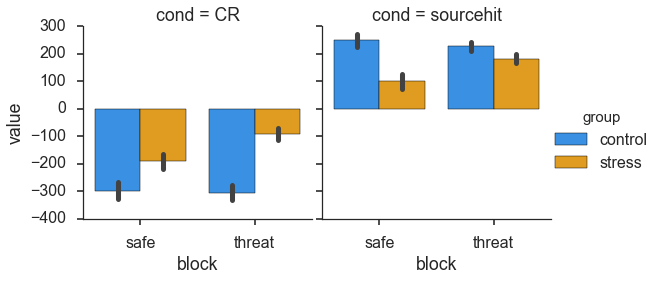

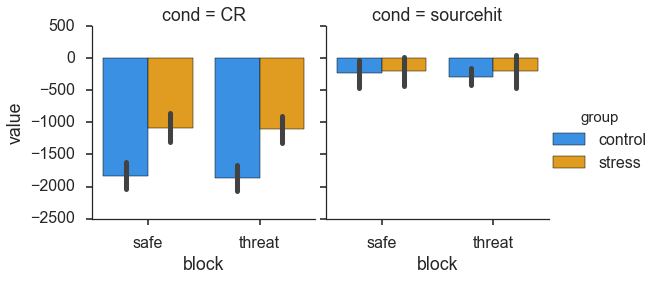

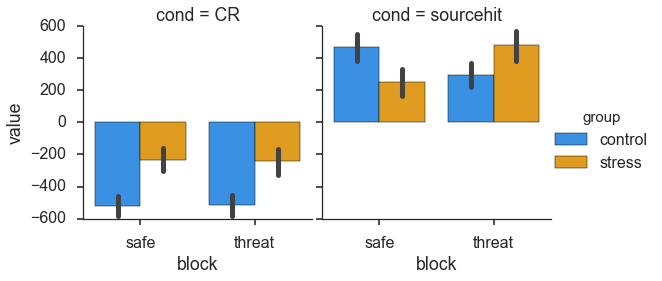

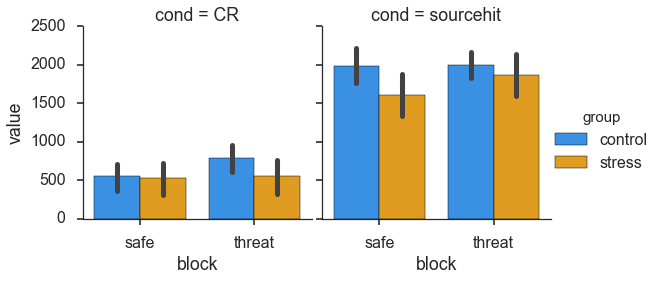

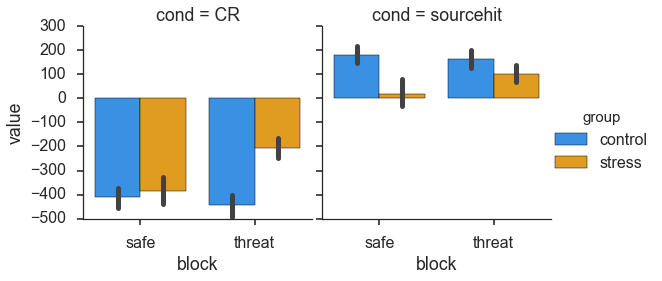

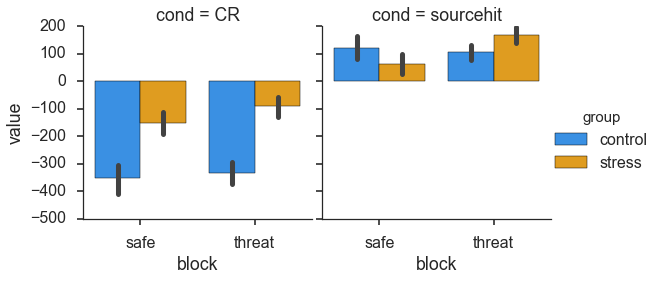

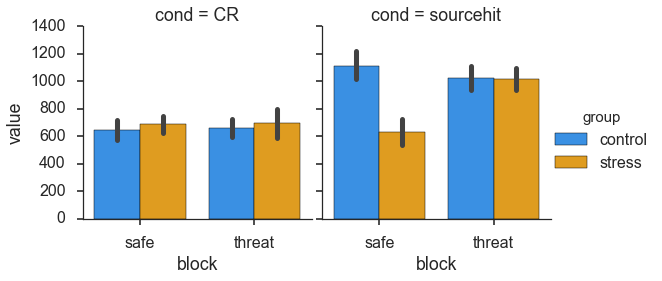

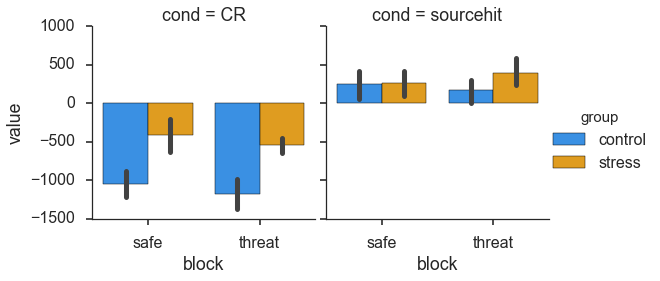

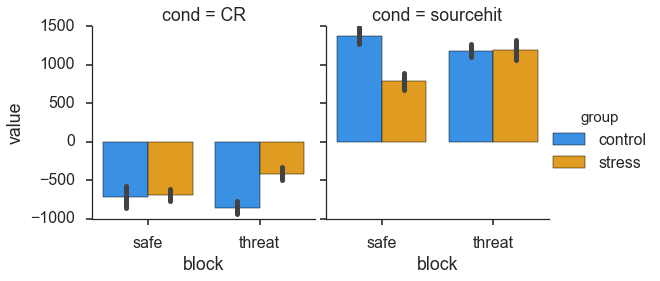

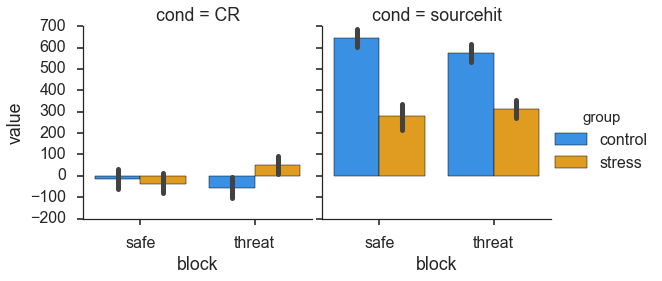

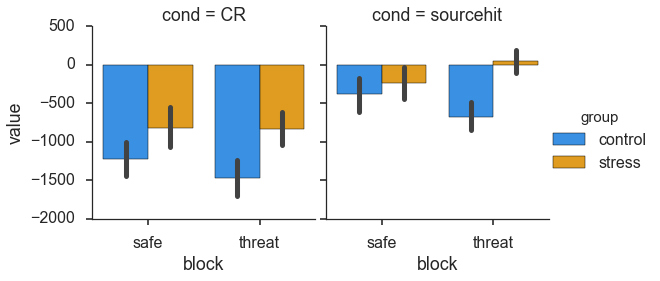

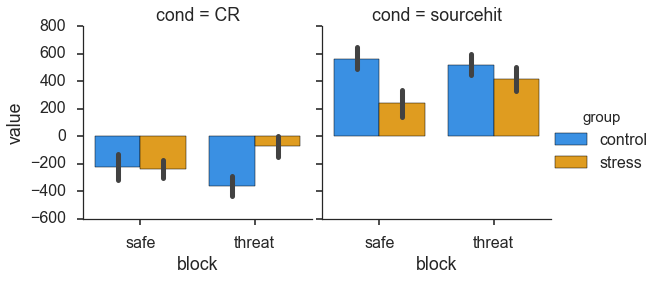

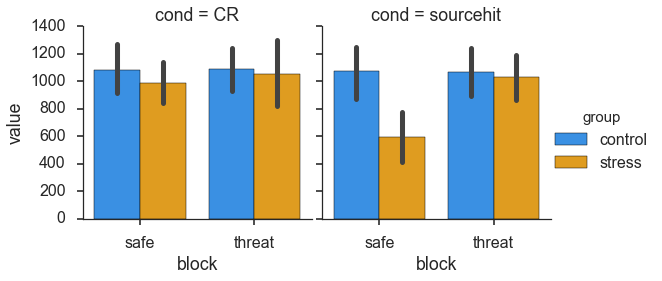

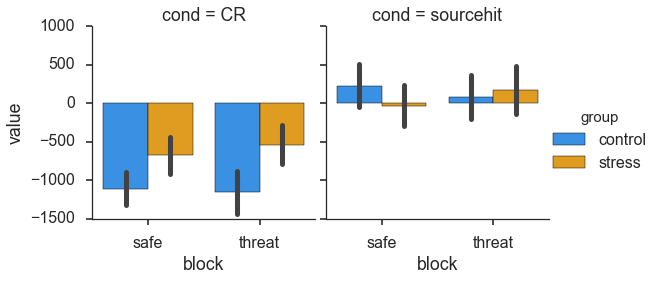

In [17]:
output = op.join(fileroot, 'roi', 'pe_{roi}_SHvCR.png')

for roi in set(df.roi):

    sns.factorplot(x='block', y='value', hue='group', ci=68, 
                   palette=['dodgerblue', 'orange'], 
                   col='cond', kind='bar',
                   data=df.loc[(df.cond.isin(['sourcehit', 'CR'])) &
                               (df.roi == roi)])
    
    plt.savefig(output.format(roi=roi))

## Extract pes from sphere around peak from contrast

In [6]:
filename = '/Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group/roi/pe_sourcehit-cr_zstat1_peak1_5mm_sphere_masked.nii.csv'
df = pd.read_csv(filename, index_col=0)

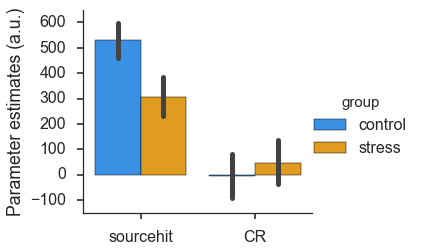

In [9]:
sns.factorplot(x='cond', y='value', hue='group', ci=68, 
               palette=['dodgerblue', 'orange'], order=['sourcehit', 'CR'],
               data=df.loc[df.cond.isin(['sourcehit', 'CR'])], kind='bar', aspect=1.2)
plt.xlabel('')
plt.ylim(-150, 650)
plt.ylabel('Parameter estimates (a.u.)')
# sns.despine()

plt.savefig('/Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group/roi/pe_sourcehit-cr_zstat1_peak1_5mm_sphere_masked.png', 
            dpi=300)